In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import cv2
from PIL import Image

In [2]:
myDF = pd.read_json("/mnt/raid/home/ayrisbud/yolov5/runs/val/exp14/best_predictions.json")

In [3]:
myDF.tail()
myLabelList = ['No structures visible', 'Head Visible',
                'Abdomen Visible', 'Amniotic fluid visible', 
                'Placenta visible', 'Fetus or CRL visible']

In [4]:
myDf2 = myDF.sort_values("score", ascending=False)

In [5]:
myDf2.head()
print(myDf2.shape)

(925, 4)


In [6]:
myDf3 = myDf2.drop_duplicates(subset=['image_id', 'category_id'], keep= 'first')

In [7]:
print(myDf3.shape)

(870, 4)


In [8]:
myDf3.head()

image_id  category_id  \
799  6c012ec5-8b96-458b-825b-7030d709e6e5            1   
504  1bf5adaa-cbed-451a-b916-99611a68b49f            3   
318  f381bb2a-1dca-4b99-901e-4dc78af2a5da            3   
27   a890b50d-b02e-46de-83a9-499b49e36b55            1   
498  1d721d26-6cfa-445f-8bfc-ba0efb971592            3   

                                     bbox    score  
799    [174.099, 156.958, 222.9, 202.774]  0.73257  
504    [256.0, 210.334, 173.318, 190.898]  0.70864  
318  [192.277, 187.714, 129.233, 127.167]  0.70263  
27    [212.464, 188.28, 234.859, 200.893]  0.69967  
498   [234.207, 291.818, 163.311, 96.169]  0.69762

In [9]:
myDf4 = myDf3.sort_index()

In [10]:
myDf4.head()

image_id  category_id  \
0  0078be74-8a06-4406-8425-3fb771acd556            4   
1  0078be74-8a06-4406-8425-3fb771acd556            3   
2  ae4de569-8804-45fe-b43b-28d6a01738a6            4   
3  ae4de569-8804-45fe-b43b-28d6a01738a6            3   
4  ae154d7b-51a1-4ae6-be19-efe1dc418fe9            4   

                                   bbox    score  
0   [231.256, 315.595, 172.71, 144.261]  0.29367  
1  [244.511, 330.902, 152.989, 130.029]  0.29174  
2  [206.062, 201.594, 249.953, 167.325]  0.47762  
3  [219.084, 225.403, 236.664, 140.251]  0.30393  
4     [200.927, 152.75, 288.88, 217.95]  0.41208

In [11]:
myDf4['img_path'] = "/mnt/raid/home/ayrisbud/USOD/images/val/" + myDf4['image_id'] + ".png"

In [12]:
myDf4.tail()

image_id  category_id  \
919  48e07b62-7009-4acc-ae7a-57aba6aaa217            3   
920  47fe3d88-d0a0-4174-82ae-3d0c46c53ff7            3   
922  7b91c442-c2d1-4ec6-ba4a-bf0e42c7a4bb            2   
923  fdc6d74f-54e7-4476-b688-de70bed9778f            1   
924  fdc6d74f-54e7-4476-b688-de70bed9778f            3   

                                     bbox    score  \
919  [159.962, 207.214, 279.977, 204.109]  0.33621   
920  [259.256, 254.944, 160.009, 115.505]  0.54236   
922  [273.827, 212.775, 188.729, 202.414]  0.59578   
923  [198.453, 195.672, 243.943, 207.689]  0.56386   
924  [194.647, 200.051, 252.035, 211.402]  0.23816   

                                              img_path  
919  /mnt/raid/home/ayrisbud/USOD/images/val/48e07b...  
920  /mnt/raid/home/ayrisbud/USOD/images/val/47fe3d...  
922  /mnt/raid/home/ayrisbud/USOD/images/val/7b91c4...  
923  /mnt/raid/home/ayrisbud/USOD/images/val/fdc6d7...  
924  /mnt/raid/home/ayrisbud/USOD/images/val/fdc6d7...

In [13]:
myDf4['label_path'] = "/mnt/raid/home/ayrisbud/USOD/labels/val/" + myDf4['image_id'] + ".txt"

In [14]:
print(myDf4["label_path"][0])

/mnt/raid/home/ayrisbud/USOD/labels/val/0078be74-8a06-4406-8425-3fb771acd556.txt


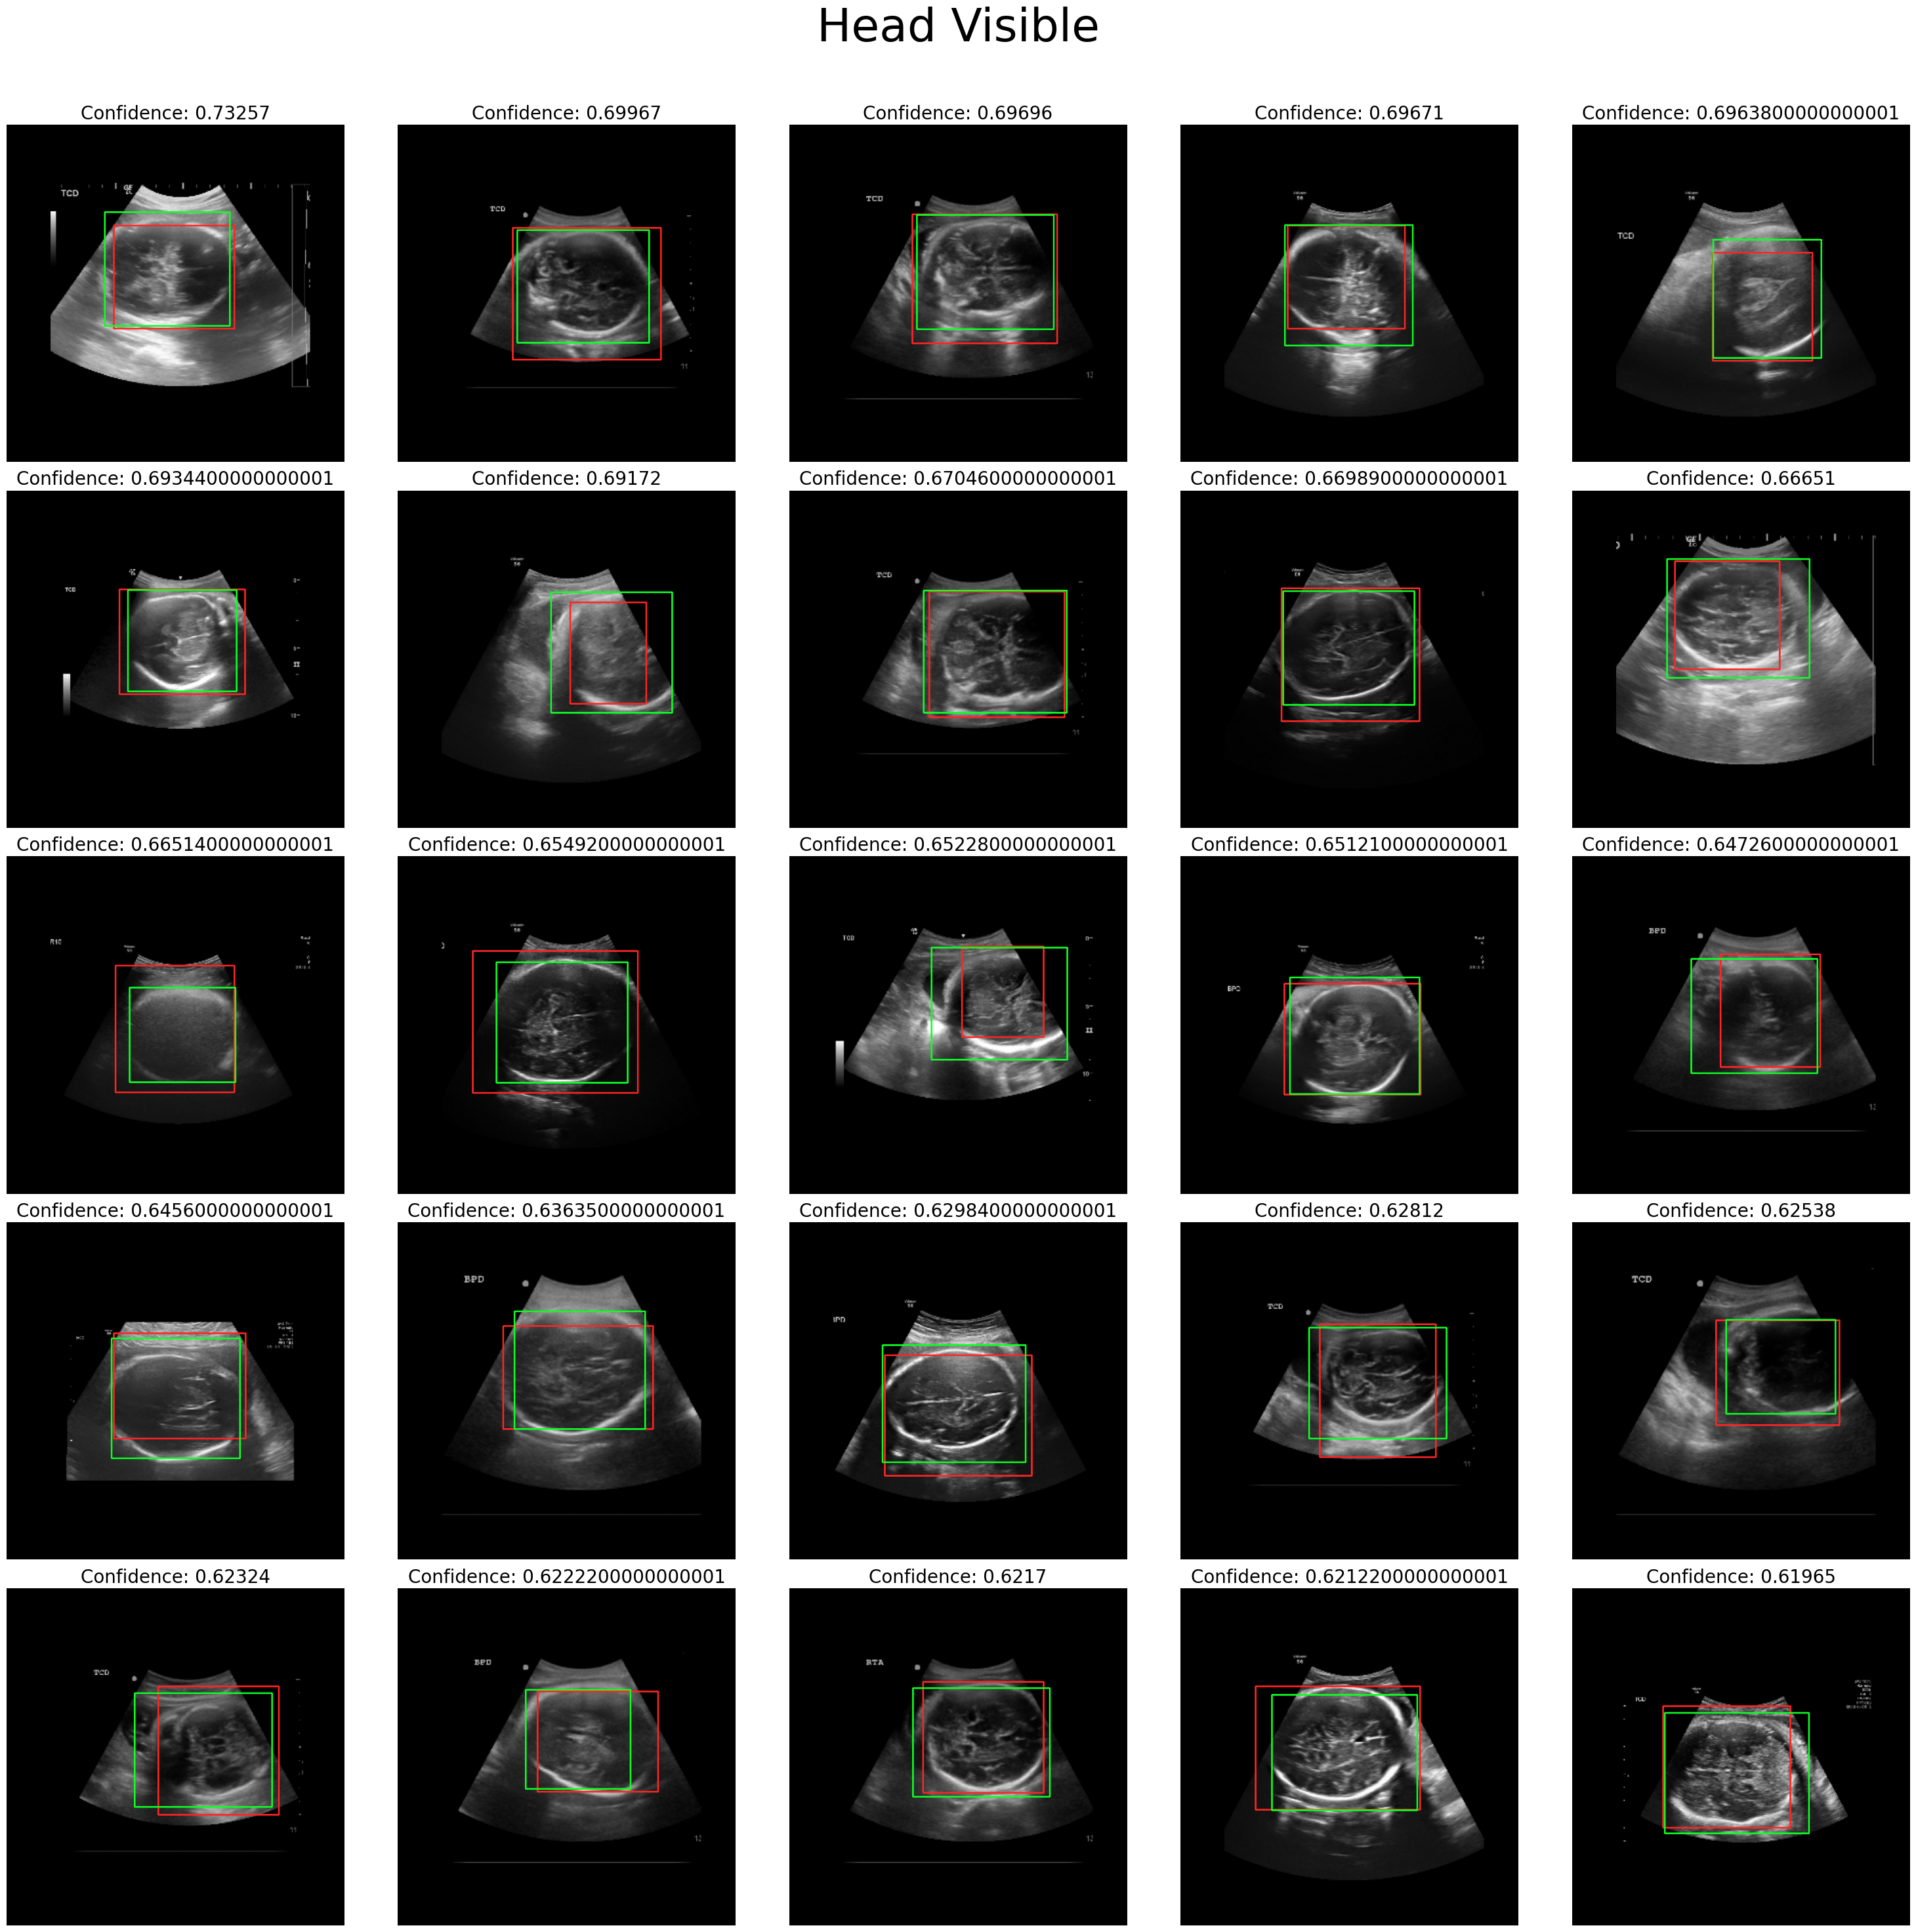

Ground truth does not exist!!
Ground truth does not exist!!


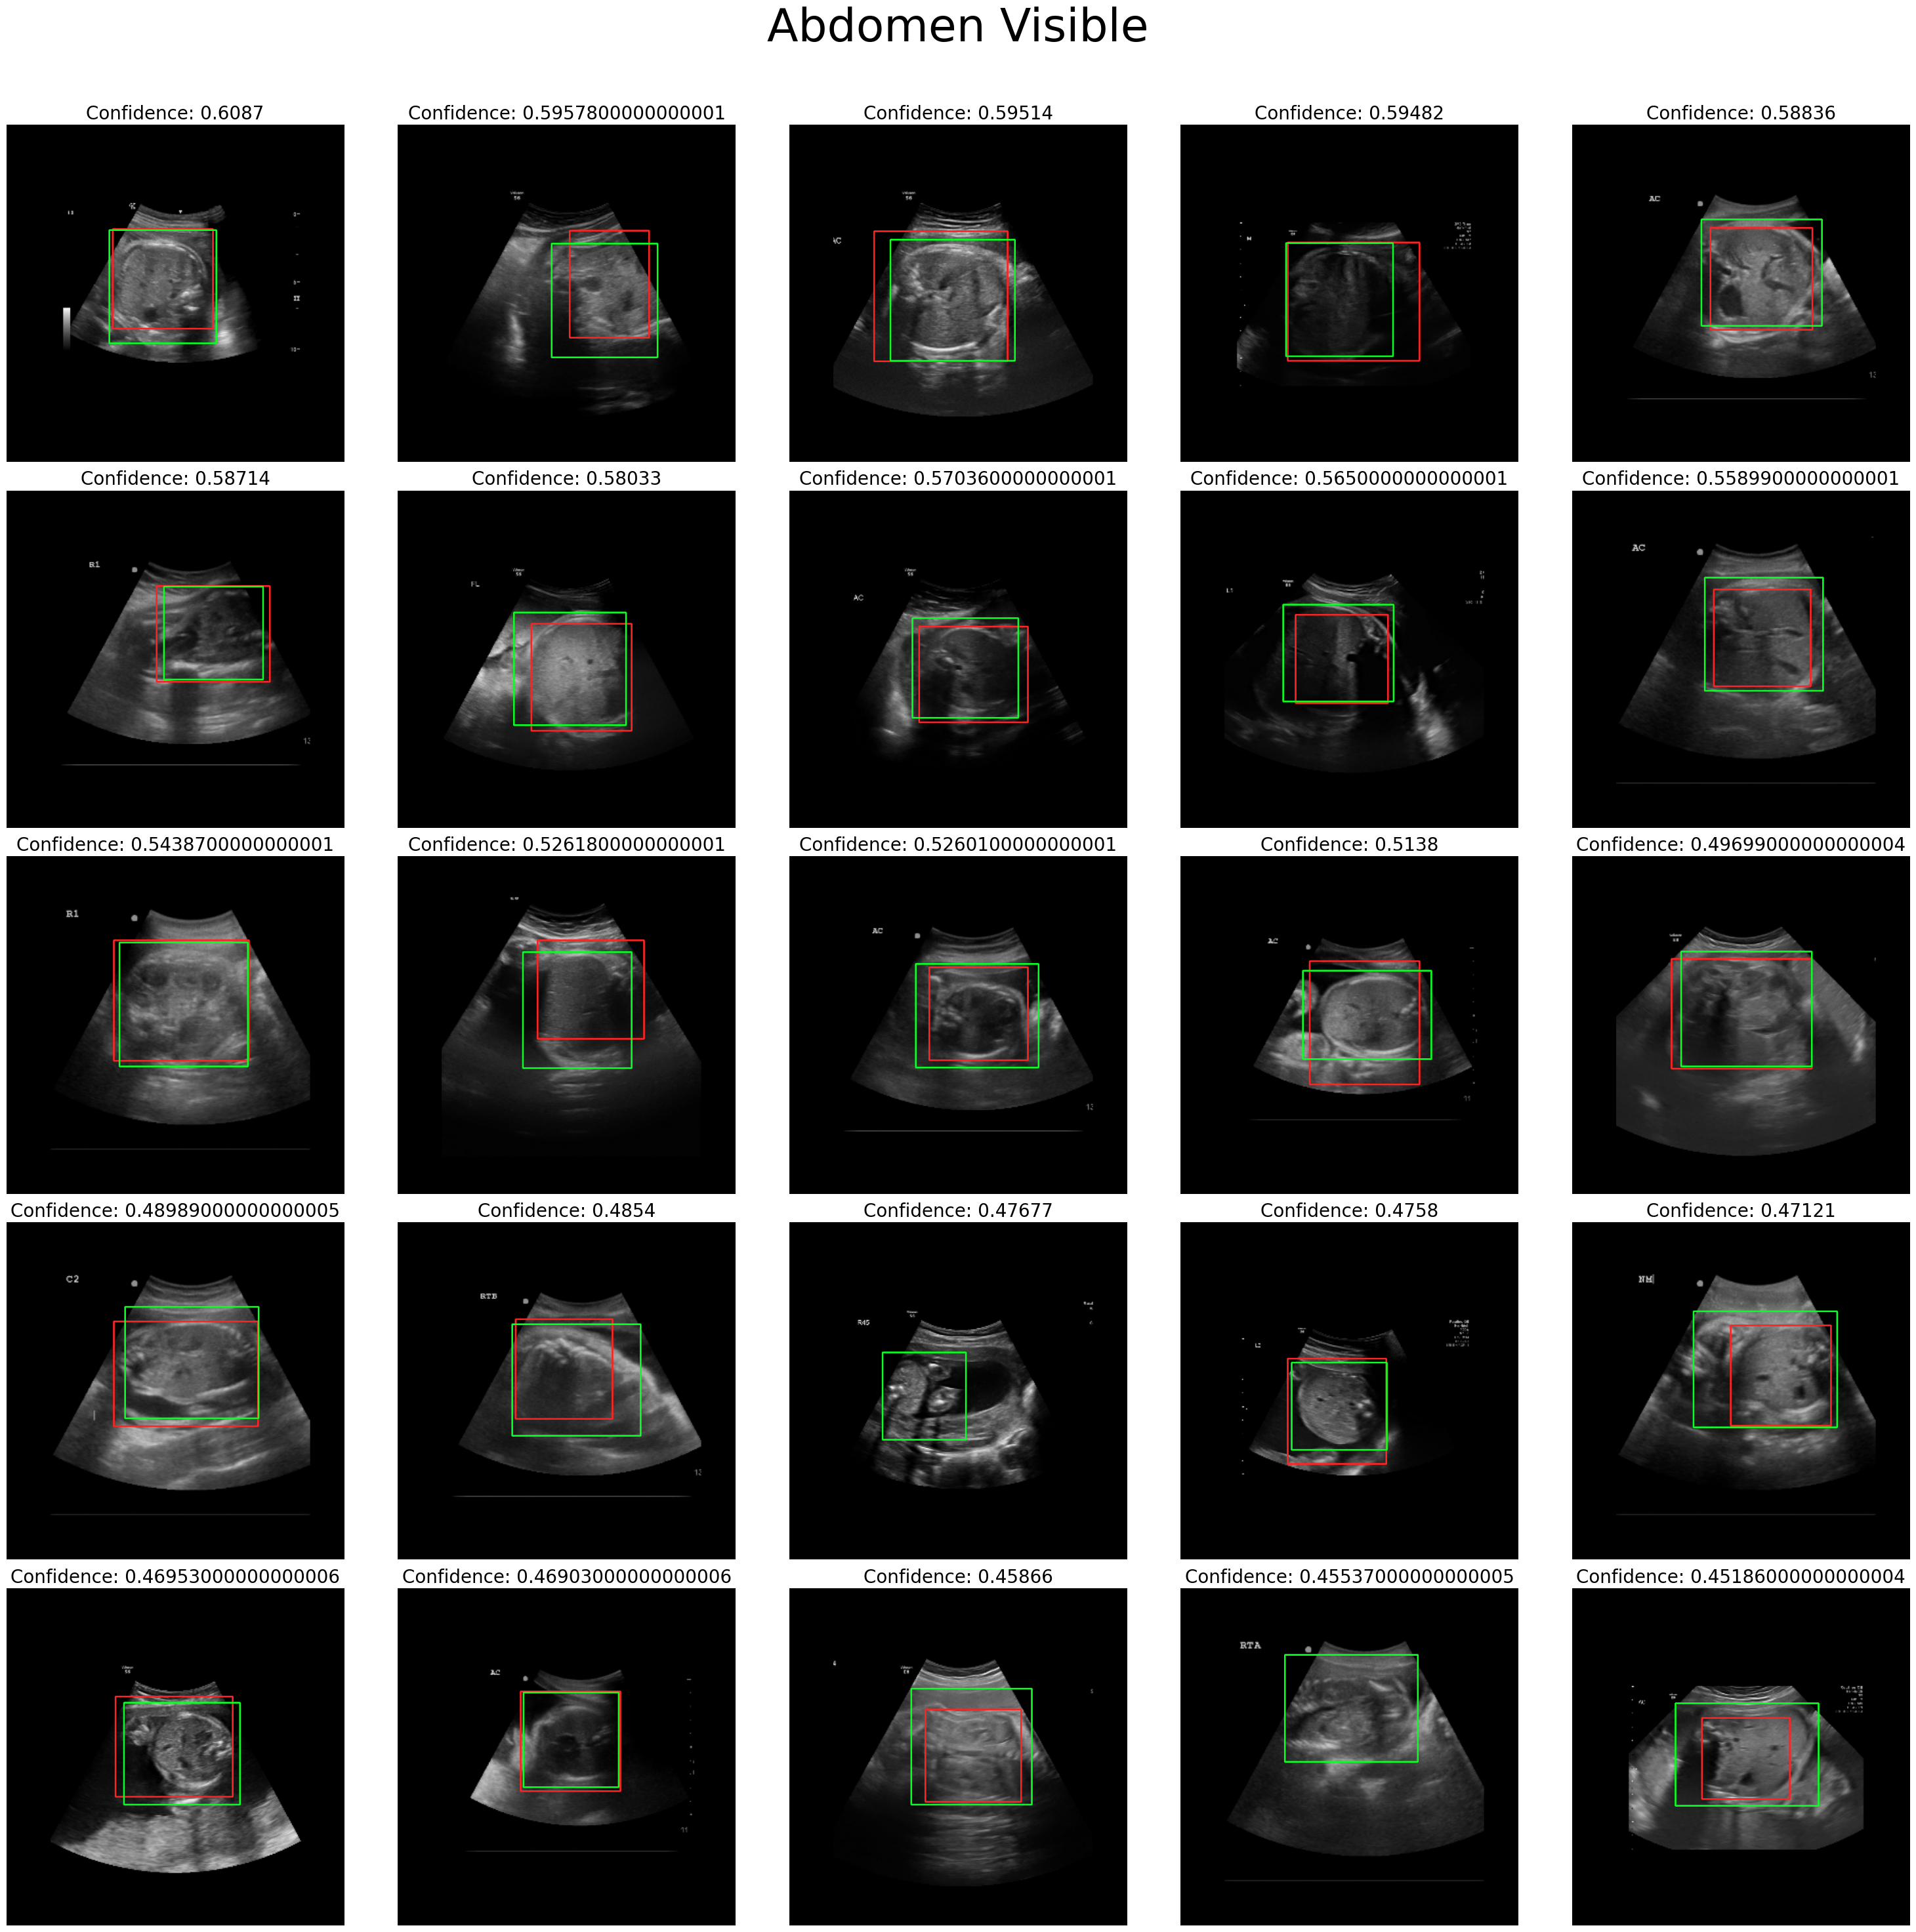

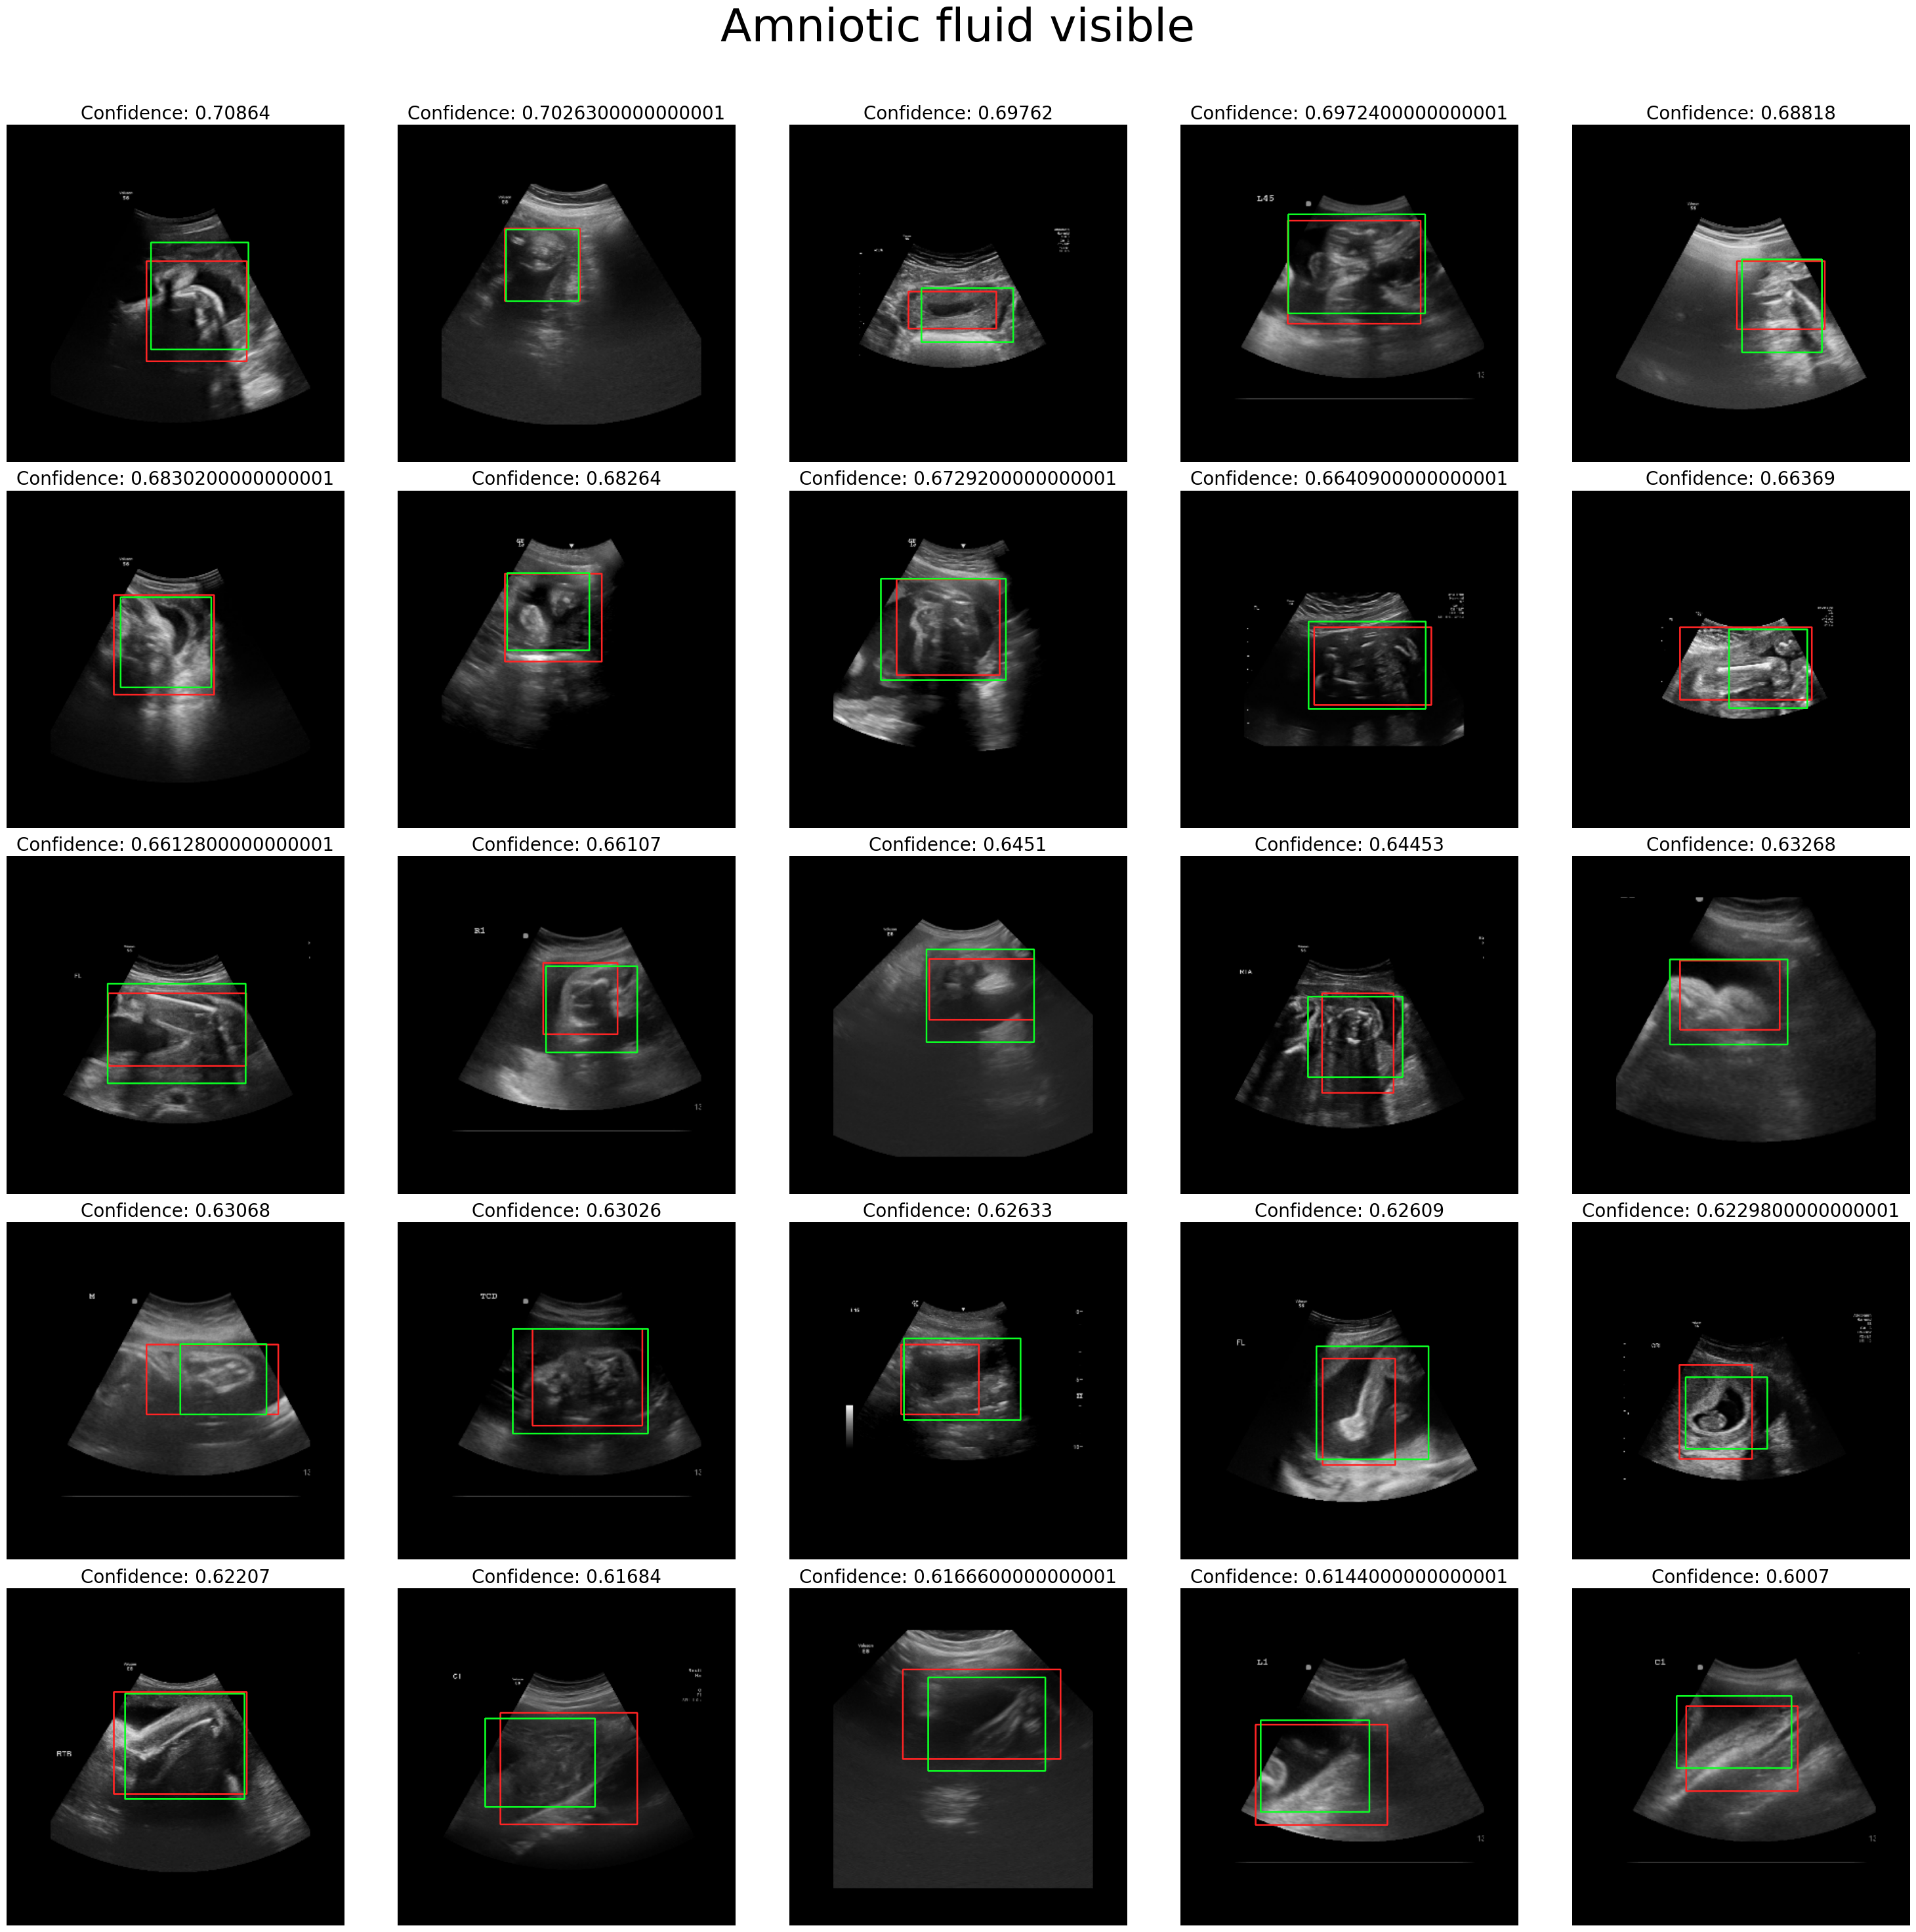

Ground truth does not exist!!
Ground truth does not exist!!
Ground truth does not exist!!
Ground truth does not exist!!
Ground truth does not exist!!
Ground truth does not exist!!
Ground truth does not exist!!
Ground truth does not exist!!
Ground truth does not exist!!
Ground truth does not exist!!
Ground truth does not exist!!
Ground truth does not exist!!
Ground truth does not exist!!
Ground truth does not exist!!
Ground truth does not exist!!
Ground truth does not exist!!
Ground truth does not exist!!
Ground truth does not exist!!
Ground truth does not exist!!
Ground truth does not exist!!
Ground truth does not exist!!
Ground truth does not exist!!
Ground truth does not exist!!


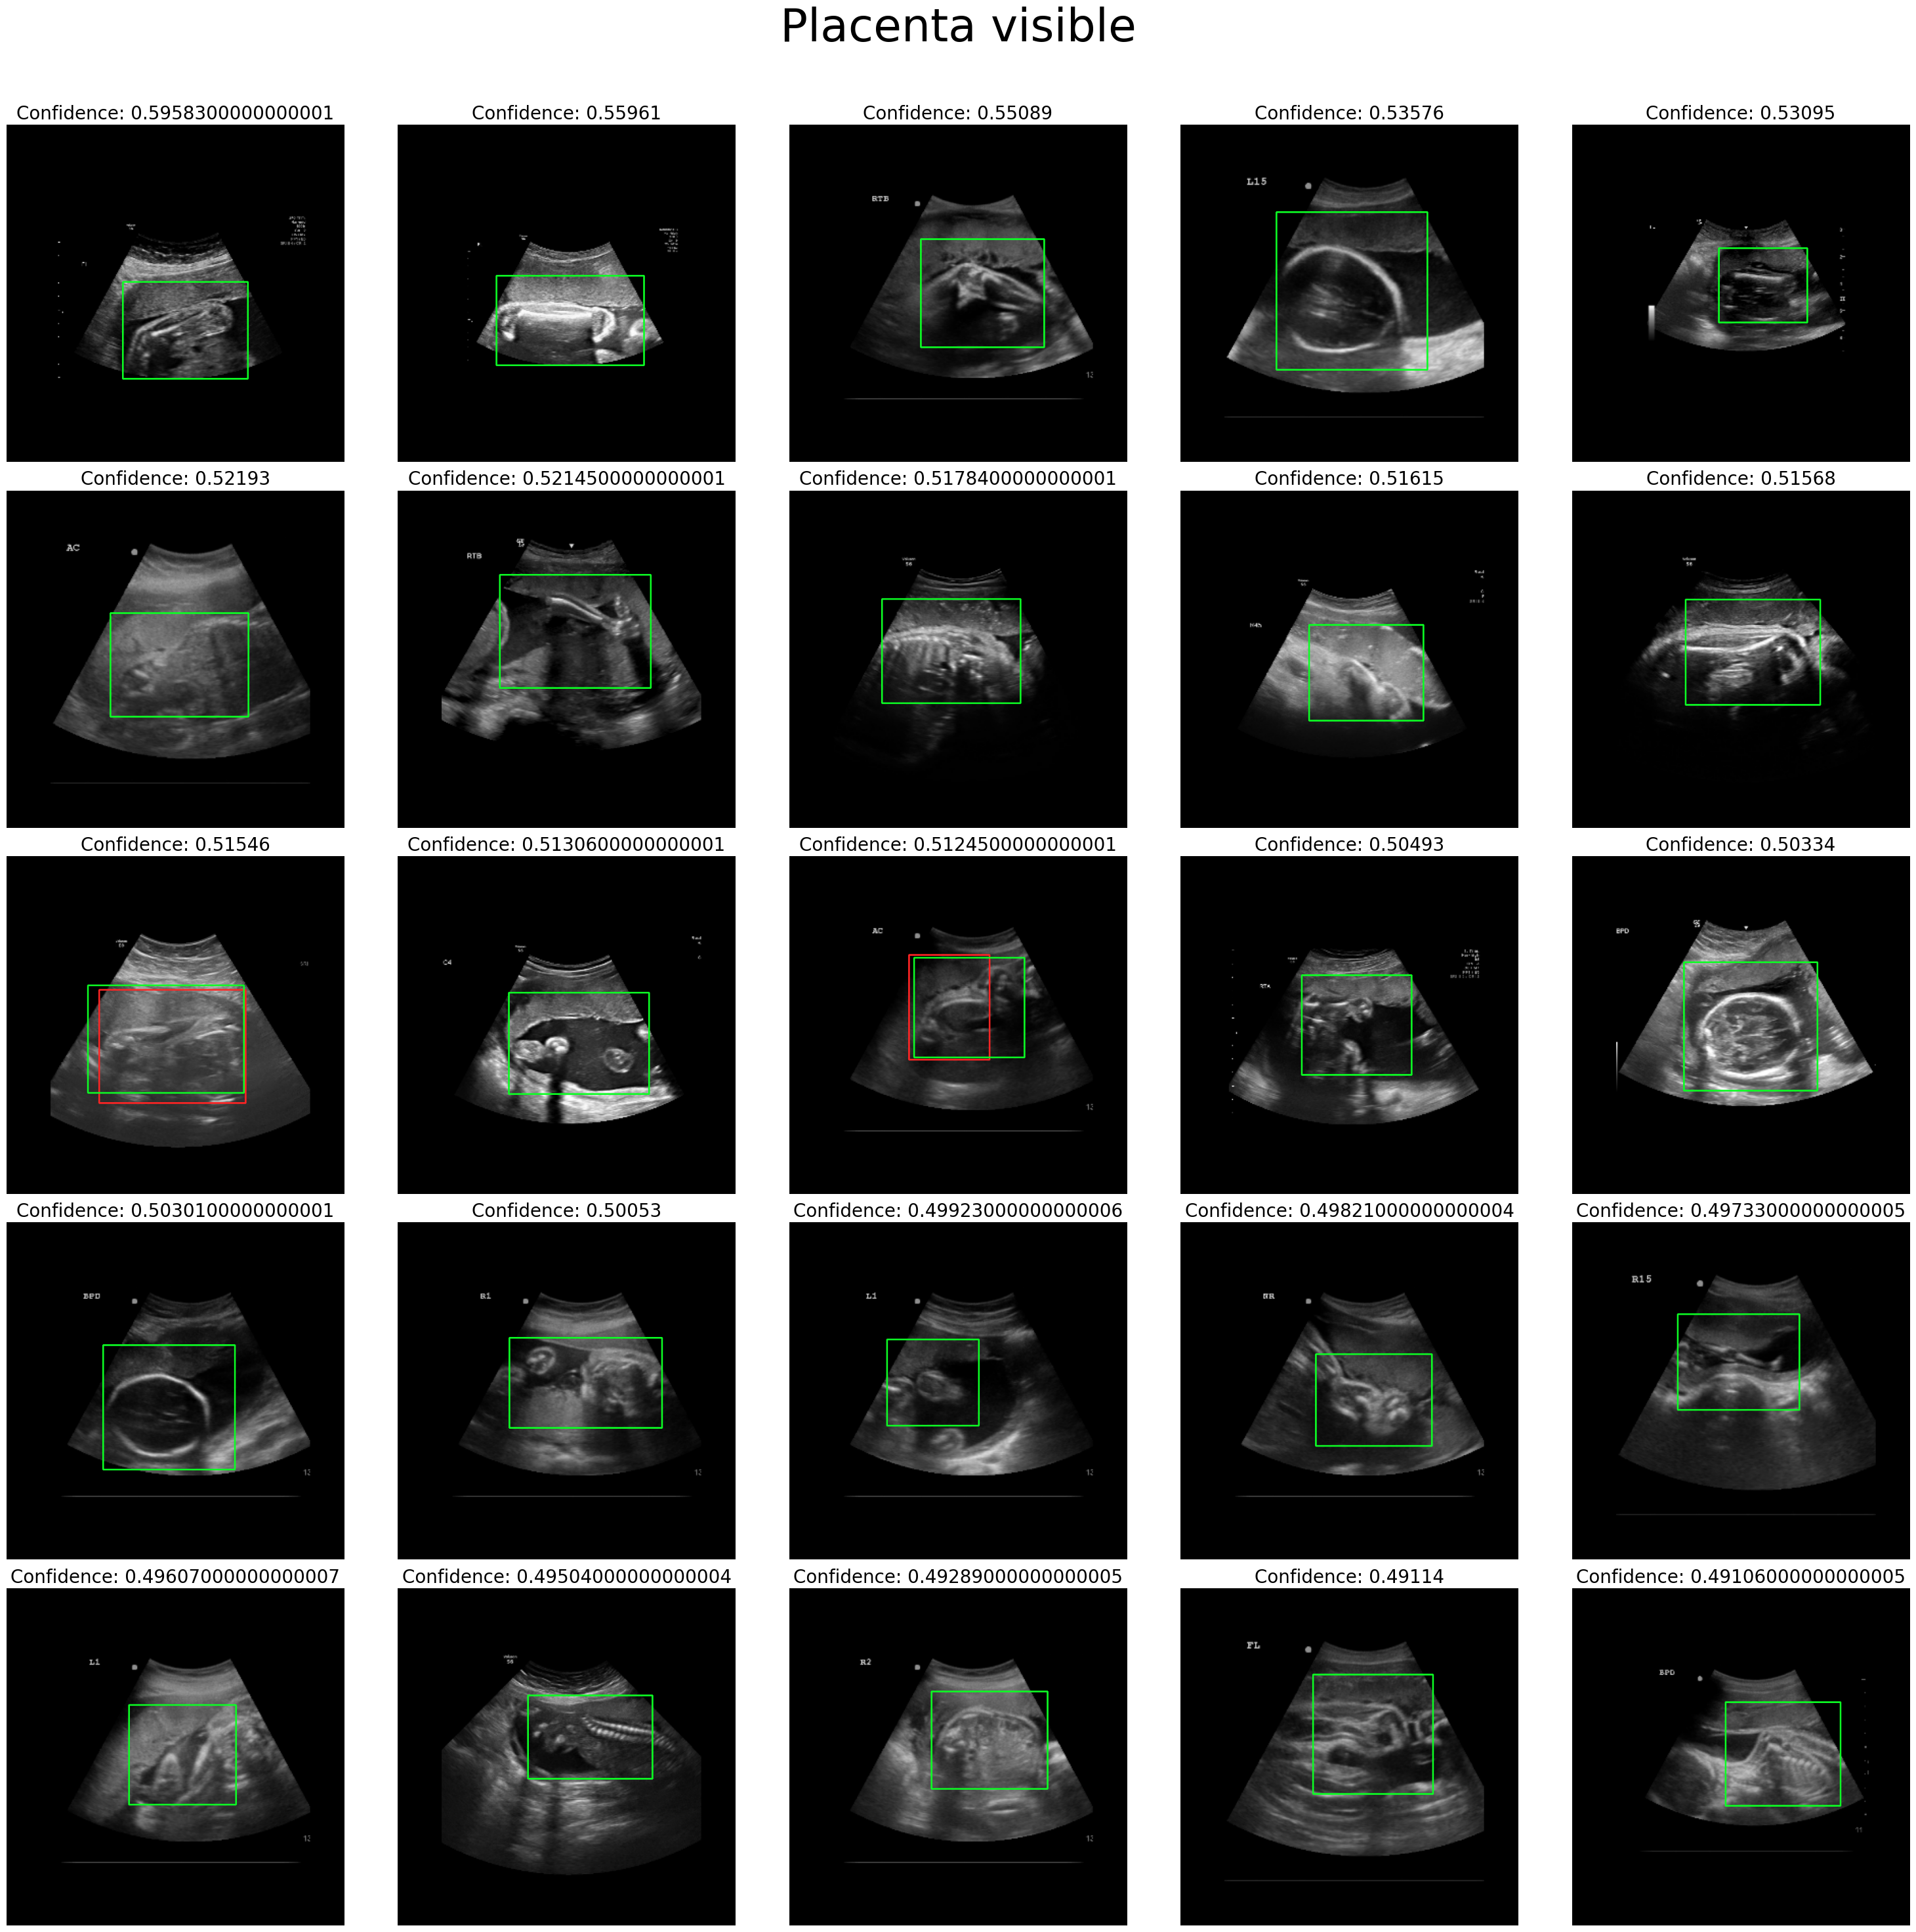

In [17]:
for i in range(1, 5):
    df = myDf4[myDf4['category_id'] == i]
    dfa = df.sort_values("score", ascending=False)
    # print(df.head())
    # df2 = df.sample(n=6)
    df2 = dfa.head(25)
    df2 = df2.reset_index()
    fig, ax = plt.subplots(5, 5, figsize=(30,30))
    ax = ax.flatten()
    for index, row in df2.iterrows():
        # print("Index is: ",index)
        # print(row["bbox"])
        img_width = 600
        img_height = 600
        myImage = cv2.imread(row["img_path"])
        x = int(row["bbox"][0])
        # print(x)
        y = int(row["bbox"][1])
        # print(y)
        w = int(row["bbox"][2])
        # print(w)
        h = int(row["bbox"][3])
        # print(h)
        column_names = ['class_id', 'center_x', 'center_y', 'width', 'height']
        try:
            df_ground = pd.read_csv(row["label_path"], delimiter=' ', header=None, names=column_names)
            df_ground1 = df_ground[df_ground["class_id"] == i]
            x_ground_centre = df_ground1["center_x"][0]
            # print(x_ground_centre)
            y_ground_centre = df_ground1["center_y"][0]
            # print(y_ground_centre)
            w_ground_norm = df_ground1["width"][0]
            # print(w_ground_norm)
            h_ground_norm = df_ground1["height"][0]
            # print(h_ground_norm)
            x_ground = int((x_ground_centre - (w_ground_norm / 2)) * img_width)
            y_ground = int((y_ground_centre - (h_ground_norm / 2)) * img_height)
            w_ground = int(w_ground_norm * img_width)
            h_ground = int(h_ground_norm * img_height)
            # print(x_ground, y_ground, w_ground, h_ground)
            cv2.rectangle(myImage, (x_ground, y_ground), (x_ground+w_ground, y_ground+h_ground), (36, 36, 255), 2)
        except:
            print("Ground truth does not exist!!")

        # print(x,y,w,h)
        # print(x,y,x+w,y+h)
        # print(myImage.shape)
        # myImage = Image.open(row["img_path"])
        # print(type(myImage))
        cv2.rectangle(myImage, (x, y), (x+w, y+h), (36, 255, 12), 2)
        # plt.plot(myImage)
        ax[index].imshow(cv2.cvtColor(myImage, cv2.COLOR_BGR2RGB))
        # print(row['score'])
        ax[index].set_title("Confidence: " + str(row['score']), fontsize=20)
        ax[index].axis('off')
    for i in range(6, 3*2):
        fig.delaxes(ax[i])
    # print("BEFORE SHOW")
    plt.suptitle(myLabelList[i], fontsize = 50)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    # plt.show()
    plt.savefig("/mnt/raid/home/ayrisbud/resultGraphs/7thSept2023/" + myLabelList[i] + "_graph.png")
    # print("AFTER SHOW")
        
    
